# Car price prediction

In this notebook we are going to do a regression project to predict selling price of a car based on some features that are provided in dataset.

## Data Dictionary

* **Car_name**       -----> The name of the car.

* **Year**           -----> Year of car production.

* **Selling_price**  -----> The price that car was dealed with: target value

* **Present_price**  -----> Current car's price .

* **Kms_Driven**     -----> The distance traveled by the car in kilometer.

* **Fuel_Type**      -----> Fuel type that car uses.

* **Seller_type**    -----> Car has sold be a dealer or a individual.

* **Transmission**   -----> Type of gearbox that car has.

* **Owner**          -----> The number of previous owner.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Defining the path
path = 'E:/EDU/Programming/Python/AI/car_prediction_data.csv'

In [3]:
dataset = pd.read_csv(path)
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data preprocessing and Exploratory data analysis.

In [4]:
# see the unique values
print(dataset['Fuel_Type'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [5]:
# finding null values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Car name is not nessesary as it has no effect on price of the car
dataset = dataset.drop('Car_Name', axis = 1)

In [7]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# insted of year of the car production it is better to have the age of it. using import datetime to get current year
import datetime
current_time = datetime.datetime.now()
current_year = current_time.year
dataset['Car_age'] = current_year - dataset['Year']

In [12]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [13]:
# know we do not need Year column
dataset = dataset.drop('Year', axis = 1)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### Let's see the relation between indipendent variables and dependent one which is 'Selling_Price'

**Selling_Price VS Present_Price**

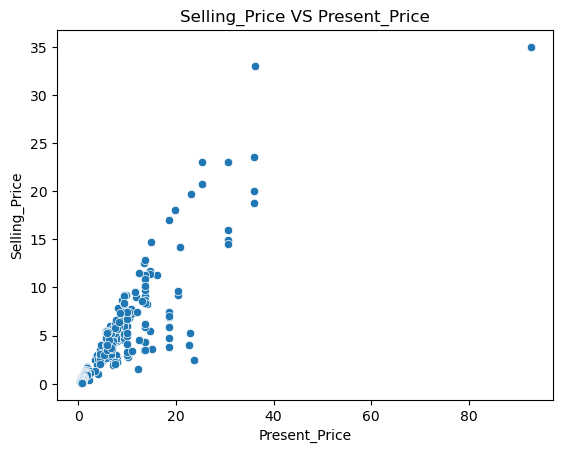

In [14]:
sns.scatterplot(x = 'Present_Price', y = 'Selling_Price', data = dataset).set_title('Selling_Price VS Present_Price');

The scatter plot displays the rise in selling price in relation to the current price. Nonetheless, there are certain cars whose price is comparatively lower than others with a similar current price. Hence, there must be additional factors influencing the selling price.

**Selling_Price VS Kms_Driven**

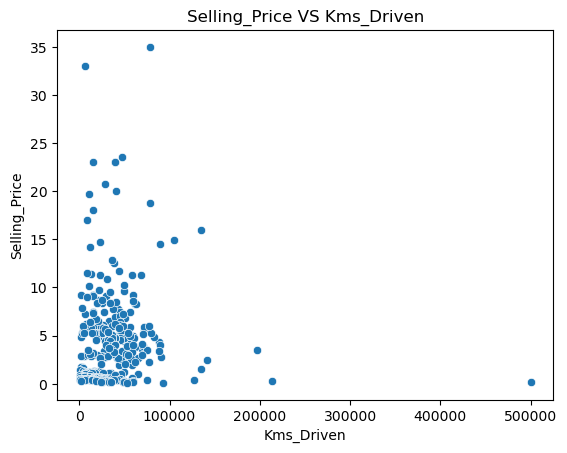

In [15]:
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = dataset).set_title('Selling_Price VS Kms_Driven');

There appears to be no specific correlation between the `selling price` and `kms_Driven`, as observed.

**Selling_Price VS Fuel_Type**

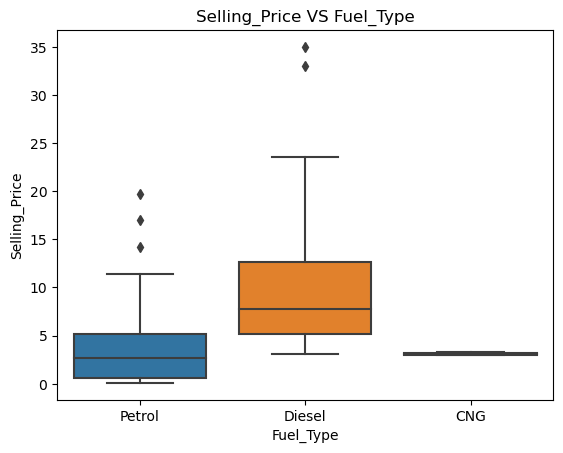

In [16]:
sns.boxplot(x = 'Fuel_Type', y = 'Selling_Price', data = dataset).set_title('Selling_Price VS Fuel_Type');

The plot indicates that cars fueled by `diesel` tend to have higher selling prices. It is important to take into account the limited number of car samples with CNG fuel type in this dataset.

**Selling_Price VS Seller_Type**

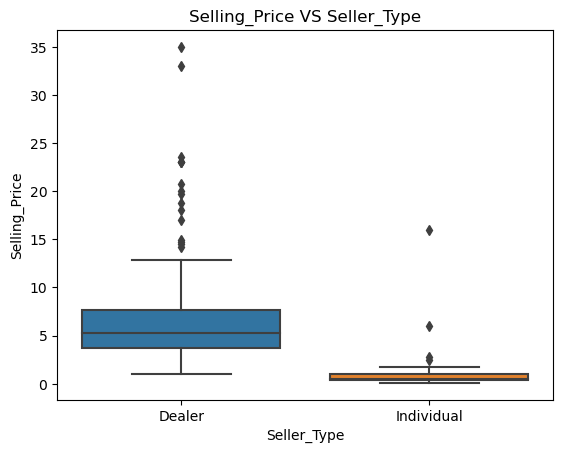

In [17]:
sns.boxplot(x = 'Seller_Type', y = 'Selling_Price', data = dataset).set_title('Selling_Price VS Seller_Type');

We can observe the impact of the seller type on the selling price, which suggests that cars sold by a "Dealer" generally fetch higher selling prices.

**Selling_Price VS Transmission**


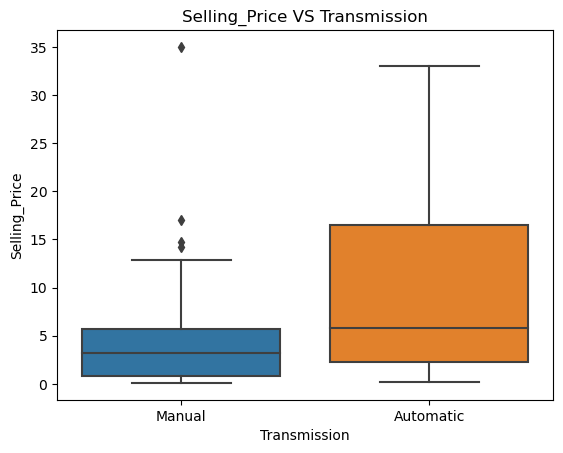

In [18]:
sns.boxplot(x = 'Transmission', y = 'Selling_Price', data = dataset).set_title('Selling_Price VS Transmission');

The presented plot demonstrates the influence of the transmission type on the selling price. It is evident that cars equipped with automatic transmission tend to be more expensive compared to those with manual transmission. Nevertheless, there are instances where some cars with manual transmission command higher selling prices.

**Selling_Price VS Owner**

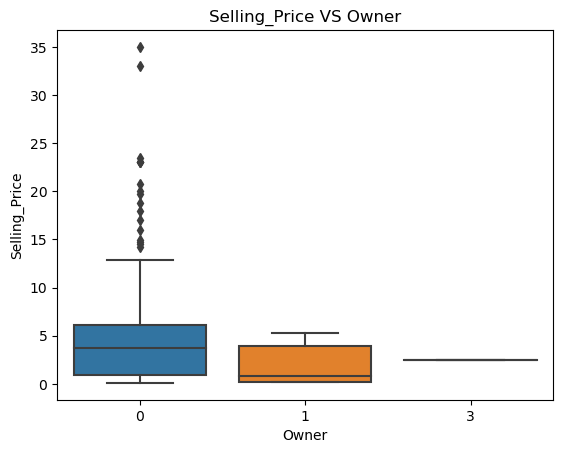

In [19]:
sns.boxplot(x = 'Owner', y = 'Selling_Price', data = dataset).set_title('Selling_Price VS Owner');

The graph illustrates that the selling price typically declines as the number of previous owners increases.

**Selling_Price VS Car_age**

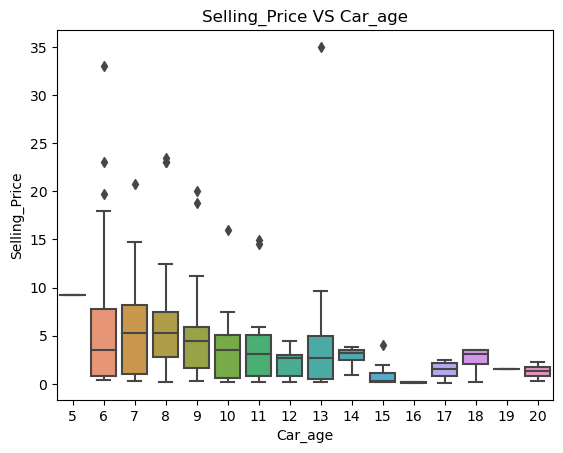

In [20]:
sns.boxplot(x = 'Car_age',  y = 'Selling_Price', data = dataset).set_title('Selling_Price VS Car_age');

The last graph demonstrates that the selling price frequently decreases as the age of the car increases.

In [21]:
dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [26]:
# creat a class to plot corrilation and do onehot_encoding for given dataset
class manual_functions():
    def __init__(self, dataset):
        
        self.dataset = dataset
        
    def corrilation(self):
        from sklearn.preprocessing import LabelEncoder
        global dataset
        cat_col = [c for i, c in enumerate(dataset.columns) if dataset.dtypes[i] in [object]]
        if len(cat_col) > 0:
            new_dataset = dataset.copy()
            for feature in cat_col:
                le = LabelEncoder()
                label = le.fit_transform(new_dataset[feature])
                new_dataset.drop([feature], axis=1, inplace=True)
                new_dataset[feature] = label

            plt.figure(figsize = (15, 15))
            g= sns.heatmap(new_dataset.corr(),annot=True, )
        else:
            plt.figure(figsize = (15, 15))
            g= sns.heatmap(new_dataset.corr(),annot=True, )

    def onehot_encoding(self):
        global dataset
        cat_col = [c for i, c in enumerate(dataset.columns) if dataset.dtypes[i] in [object]]
        for cat_features in cat_col:
            dataset = pd.get_dummies(dataset, columns = [cat_features])
        return dataset

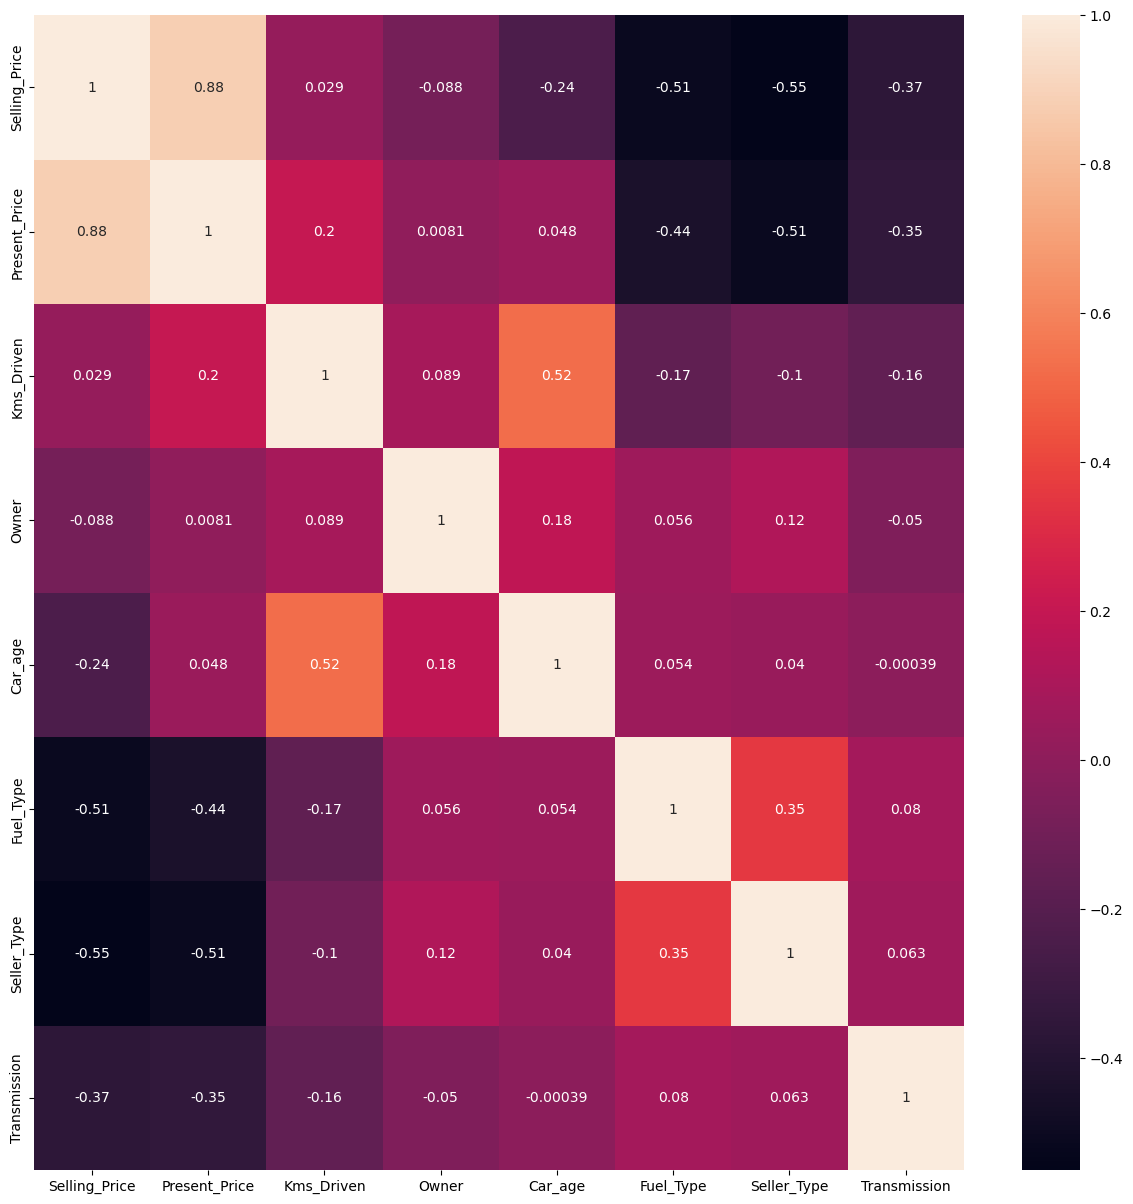

In [27]:
manual_functions.corrilation(dataset)

In this corelation matrix heatmap, we can see that the present price has highest corrilation with selling price.

In [28]:
# onehot encoding 
manual_functions.onehot_encoding(dataset)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,9,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,10,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,6,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,12,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,9,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,8,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,14,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,6,0,1,0,1,0,0,1


In [29]:
# here we need to detemine the y or target
target = dataset['Selling_Price']
X = dataset.drop('Selling_Price', axis = 1)

print(X.shape, target.shape)

(301, 11) (301,)


**Feature Importance**

Feature importance is a feature selection technique usually use for larg dataset. However our dataset is a small dataset we are goting to it anyway just to show the importance of features and are not going to implement it on out model.

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,target)

ExtraTreesRegressor()

In [31]:
print(model.feature_importances_)

[3.23726240e-01 3.64512971e-02 4.70093518e-04 7.83290823e-02
 9.38298797e-05 2.56821706e-01 8.78417882e-03 1.36674032e-01
 5.44067201e-04 6.62484185e-02 9.18570550e-02]


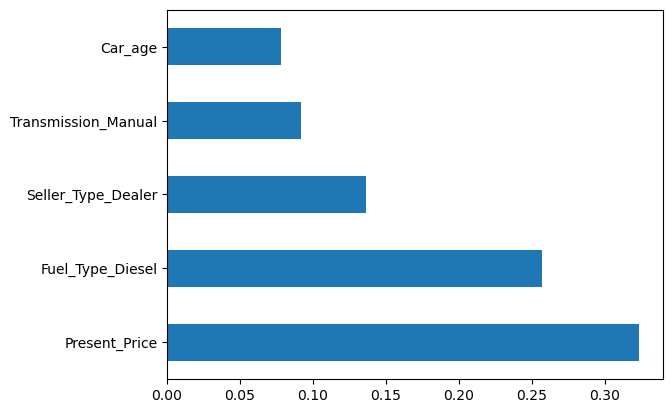

In [32]:
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')
plt.show;

As we can see the most importannt feature to predict selling price is present price.

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state= 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(225, 11) (76, 11) (225,) (76,)


### Model Creation

In this nokebook we are going to compare four different regressor and then tune each one that have poor performance then see which one is going to perform better.

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import RandomizedSearchCV

# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
GBR_model = GradientBoostingRegressor(random_state= 42)
SGDR_model = SGDRegressor(random_state= 42)
RFR_model = RandomForestRegressor()
CBR_model = CatBoostRegressor()

**GBR_model**

In [41]:
GBR_model = GradientBoostingRegressor(random_state= 42)
GBR_model.fit(X_train, y_train)
y_pred = GBR_model.predict(X_test)

In [42]:
# evaluate model
GBR_MAE = mean_absolute_error(y_test, y_pred)
GBR_MSE = mean_squared_error(y_test, y_pred)
GBR_R2 = r2_score(y_test, y_pred)

# printing the results
print(f'MAE:{GBR_MAE}, MSE: {GBR_MSE}, R2: {GBR_R2}')

MAE:0.5408562819175843, MSE: 0.8808967747078672, R2: 0.9679374302804042


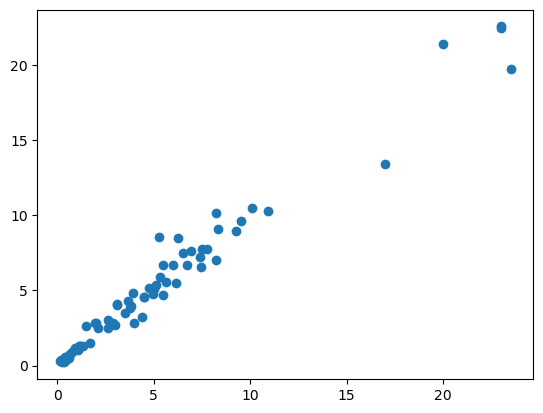

In [43]:
plt.scatter(y_test, y_pred);

As this model works prety good with default hyperparameter we do not need to tune it

In [44]:
dft = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
dft.reset_index(drop=True, inplace=True)
dft.head()

,Actual,Prediction
0,0.35,0.424882
1,10.11,10.467838
2,4.95,4.772250
3,0.15,0.268056
4,6.95,7.657061


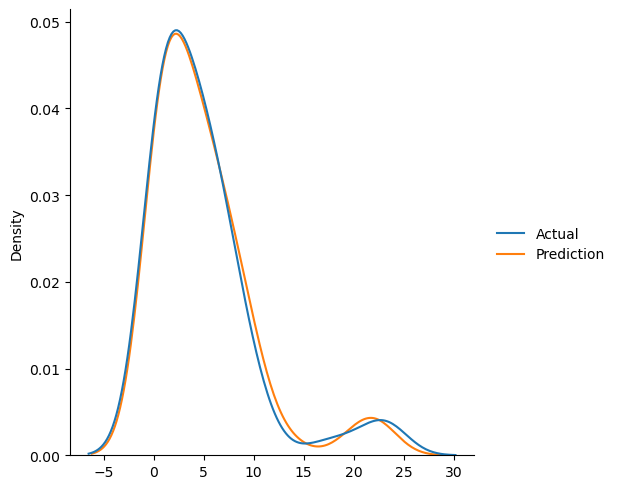

In [45]:
ax = sns.displot(data = (dft['Actual'], dft['Prediction']),kind = 'kde')

GBR model performed very good without tuning so we are not going to tune it. 

**SGDR_model**

In [46]:
SGDR_model = SGDRegressor(random_state= 42)
SGDR_model.fit(X_train, y_train)
SGDR_y_pred = SGDR_model.predict(X_test)

In [47]:
SGDR_MAE = mean_absolute_error(y_test, SGDR_y_pred)
SGDR_MSE = mean_squared_error(y_test, SGDR_y_pred)
SGDR_R2 = r2_score(y_test, SGDR_y_pred)

# printing the results
print(f'MAE:{SGDR_MAE}, MSE: {SGDR_MSE}, R2: {SGDR_R2}')

MAE:6.4245507559862e+18, MSE: 5.884683481743032e+37, R2: -2.1418863120904382e+36


In [48]:
SGDR_df = pd.DataFrame({'Actual': y_test, 'Prediction': SGDR_y_pred})
SGDR_df.head()

,Actual,Prediction
177,0.35,-4.426537e+18
289,10.11,-2.025141e+18
228,4.95,-1.106634e+19
198,0.15,-6.455367e+18
60,6.95,-7.377746e+18


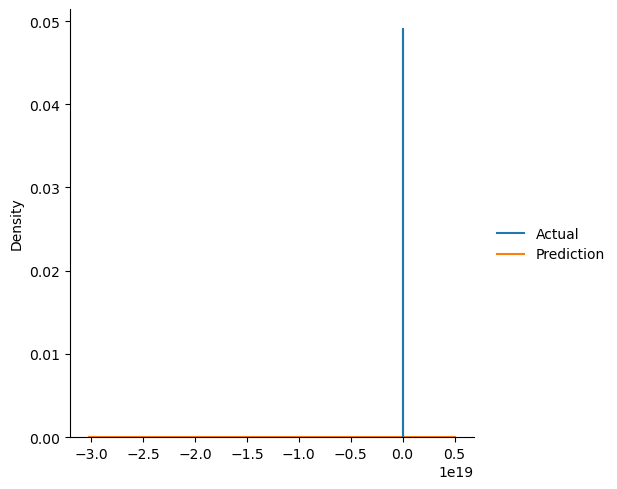

In [49]:
ax = sns.displot(data = (SGDR_df['Actual'], SGDR_df['Prediction']),kind = 'kde')

As we can see it cannot preddict well with default hyperparameter so let's tune it.

In [50]:
loss= ['squared_error','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l2', 'l1']
alpha = [float(X) for X in np.linspace(start= 0.0001, stop= 0.01, num = 100 )]
l1_ratio = [float(X) for X in np.linspace(start = 0.1, stop = 0.5, num = 100)]
fit_intercept = ['True, False']
max_iter = [int(X) for X in np.linspace(start = 900, stop = 1500, num = 100)]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
warm_start = ['False', 'True']

In [51]:
random_grid = {'loss': loss,
               'penalty': penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'learning_rate': learning_rate,
               'warm_start': warm_start,}

In [52]:
Tuned_SGDR_model = RandomizedSearchCV(estimator= SGDR_model, param_distributions=random_grid, scoring='neg_mean_absolute_error' , cv = 10, random_state= 42,)

In [53]:
Tuned_SGDR_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SGDRegressor(random_state=42),
                   param_distributions={'alpha': [0.0001, 0.0002,
                                                  0.00030000000000000003,
                                                  0.0004, 0.0005,
                                                  0.0006000000000000001,
                                                  0.0007000000000000001, 0.0008,
                                                  0.0009000000000000001, 0.001,
                                                  0.0011, 0.0012000000000000001,
                                                  0.0013000000000000002,
                                                  0.0014000000000000002, 0.0015,
                                                  0.0016, 0.0017000000000000001,
                                                  0.00180000000000...
                                                          'adaptive'],
                                        'loss': ['squared_error', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [900, 906, 912, 918, 924,
                                                     930, 936, 942, 948, 954,
                                                     960, 966, 972, 978, 984,
                                                     990, 996, 1003, 1009, 1015,
                                                     1021, 1027, 1033, 1039,
                                                     1045, 1051, 1057, 1063,
                                                     1069, 1075, ...],
                                        'penalty': ['l2', 'l1'],
                                        'warm_start': ['False', 'True']},
                   random_state=42, scoring='neg_mean_absolute_error')

In [54]:
Tuned_SGDR_model.best_params_

{'warm_start': 'False',
 'penalty': 'l1',
 'max_iter': 1324,
 'loss': 'huber',
 'learning_rate': 'adaptive',
 'l1_ratio': 0.45151515151515154,
 'alpha': 0.0089}

In [55]:
T_SGDR_y_pred = Tuned_SGDR_model.predict(X_test)

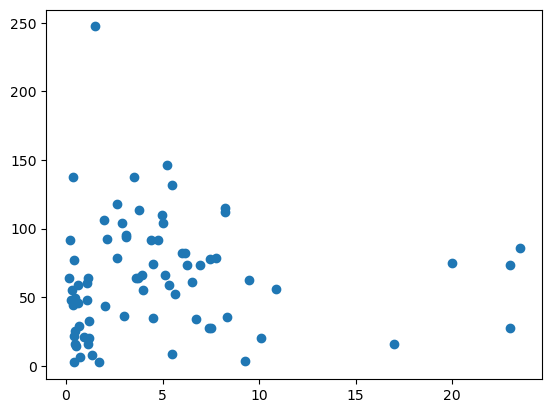

In [57]:
plt.scatter(y_test, T_SGDR_y_pred);

In [58]:
# evaluate model
T_SGDR_MAE = mean_absolute_error(y_test, T_SGDR_y_pred)
T_SGDR_MSE = mean_squared_error(y_test, T_SGDR_y_pred)
T_SGDR_R2 = r2_score(y_test, T_SGDR_y_pred)

# printing the results
print(f'MAE:{T_SGDR_MAE}, MSE: {T_SGDR_MSE}, R2: {T_SGDR_R2}')

MAE:59.07001780969827, MSE: 5217.386128116324, R2: -188.9005777859246


In [59]:
T_SGDR_df = pd.DataFrame({'Actual': y_test, 'Prediction': T_SGDR_y_pred})
T_SGDR_df.head()

,Actual,Prediction
177,0.35,43.892625
289,10.11,20.069339
228,4.95,109.763463
198,0.15,64.019826
60,6.95,73.170383


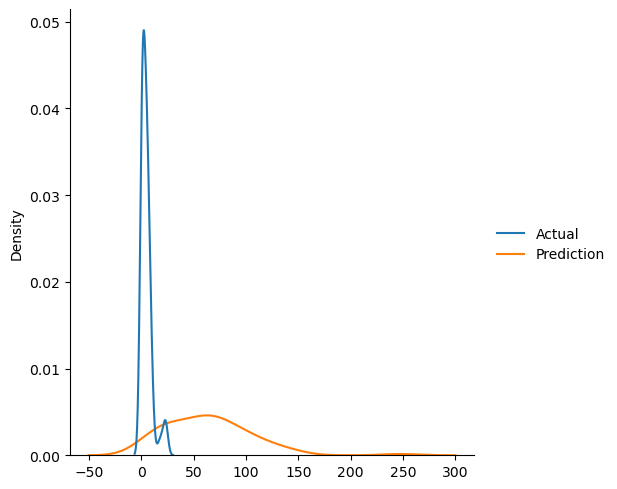

In [60]:
ax = sns.displot(data = (T_SGDR_df['Actual'], T_SGDR_df['Prediction']),kind = 'kde')

Obviously, the model has not a good performance. Howerver, it is essential to note a substantial difference between the SGDR model after the implementation of tuning techniques as compared to its pre-tuning state.`

**RandomForestRegressor**

In [61]:
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train, y_train)
RFR_y_pred = RFR_model.predict(X_test)

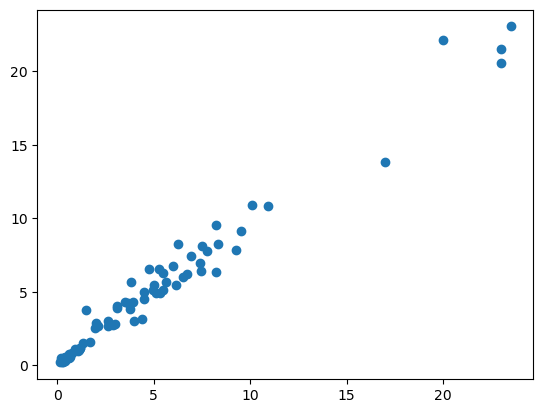

In [62]:
plt.scatter(y_test, RFR_y_pred);

In [63]:
RFR_MAE = mean_absolute_error(y_test, RFR_y_pred)
RFR_MSE = mean_squared_error(y_test, RFR_y_pred)
RFR_R2 = r2_score(y_test, RFR_y_pred)

print(f'MAE: {RFR_MAE} | MSE: {RFR_MSE} | R2: {RFR_R2}')

MAE: 0.5749657894736846 | MSE: 0.7935562621052629 | R2: 0.9711164194140571


In [64]:
RFR_df = pd.DataFrame({'Actual': y_test, 'Prediction': RFR_y_pred})
RFR_df.head()

,Actual,Prediction
177,0.35,0.4381
289,10.11,10.8830
228,4.95,5.1575
198,0.15,0.1967
60,6.95,7.4735


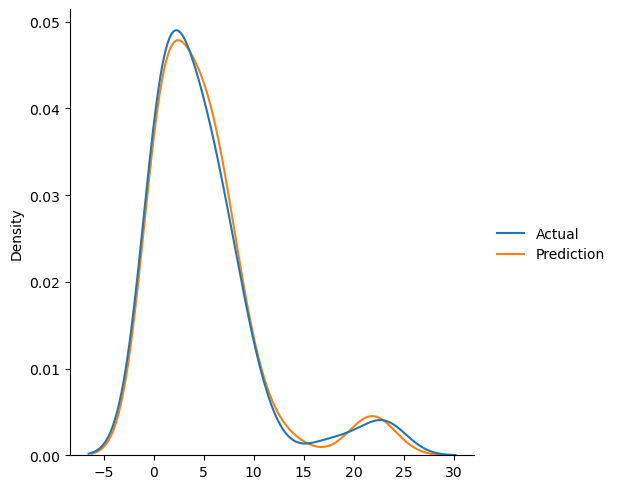

In [65]:
ax = sns.displot(data = (RFR_df['Actual'], RFR_df['Prediction']), kind = 'kde')

The random forest regressor exhibits a remarkable level of performance, rendering any further adjustments or tuning is unnecessary. 

**CatBoostRegressor**

In [66]:
CBR_model = CatBoostRegressor()
CBR_model.fit(X_train, y_train)
CBR_y_pred = CBR_model.predict(X_test)

Learning rate set to 0.032346
0:	learn: 4.9267607	total: 141ms	remaining: 2m 21s
1:	learn: 4.8379801	total: 142ms	remaining: 1m 10s
2:	learn: 4.7517828	total: 143ms	remaining: 47.6s
3:	learn: 4.6718790	total: 144ms	remaining: 35.9s
4:	learn: 4.5993245	total: 145ms	remaining: 28.9s
5:	learn: 4.5244262	total: 146ms	remaining: 24.2s
6:	learn: 4.4477143	total: 147ms	remaining: 20.8s
7:	learn: 4.3766781	total: 148ms	remaining: 18.3s
8:	learn: 4.2933881	total: 149ms	remaining: 16.4s
9:	learn: 4.2372730	total: 149ms	remaining: 14.8s
10:	learn: 4.1637480	total: 150ms	remaining: 13.5s
11:	learn: 4.1025327	total: 151ms	remaining: 12.4s
12:	learn: 4.0415710	total: 152ms	remaining: 11.5s
13:	learn: 3.9772887	total: 153ms	remaining: 10.8s
14:	learn: 3.9159160	total: 154ms	remaining: 10.1s
15:	learn: 3.8678159	total: 156ms	remaining: 9.56s
16:	learn: 3.8074929	total: 157ms	remaining: 9.06s
17:	learn: 3.7543990	total: 158ms	remaining: 8.63s
18:	learn: 3.6881904	total: 159ms	remaining: 8.23s
19:	learn

233:	learn: 0.6963347	total: 355ms	remaining: 1.16s
234:	learn: 0.6942007	total: 356ms	remaining: 1.16s
235:	learn: 0.6920196	total: 357ms	remaining: 1.16s
236:	learn: 0.6902328	total: 358ms	remaining: 1.15s
237:	learn: 0.6885304	total: 359ms	remaining: 1.15s
238:	learn: 0.6868890	total: 360ms	remaining: 1.15s
239:	learn: 0.6859095	total: 361ms	remaining: 1.14s
240:	learn: 0.6843997	total: 362ms	remaining: 1.14s
241:	learn: 0.6827112	total: 363ms	remaining: 1.14s
242:	learn: 0.6810597	total: 364ms	remaining: 1.13s
243:	learn: 0.6796305	total: 365ms	remaining: 1.13s
244:	learn: 0.6778562	total: 366ms	remaining: 1.13s
245:	learn: 0.6761690	total: 367ms	remaining: 1.13s
246:	learn: 0.6752953	total: 368ms	remaining: 1.12s
247:	learn: 0.6740172	total: 368ms	remaining: 1.12s
248:	learn: 0.6693675	total: 369ms	remaining: 1.11s
249:	learn: 0.6678745	total: 370ms	remaining: 1.11s
250:	learn: 0.6632930	total: 371ms	remaining: 1.11s
251:	learn: 0.6618541	total: 372ms	remaining: 1.1s
252:	learn: 0

406:	learn: 0.4152461	total: 532ms	remaining: 776ms
407:	learn: 0.4140096	total: 534ms	remaining: 775ms
408:	learn: 0.4128793	total: 535ms	remaining: 774ms
409:	learn: 0.4118298	total: 537ms	remaining: 772ms
410:	learn: 0.4104465	total: 537ms	remaining: 770ms
411:	learn: 0.4089917	total: 539ms	remaining: 769ms
412:	learn: 0.4079695	total: 539ms	remaining: 767ms
413:	learn: 0.4067857	total: 540ms	remaining: 765ms
414:	learn: 0.4057550	total: 541ms	remaining: 763ms
415:	learn: 0.4049901	total: 542ms	remaining: 761ms
416:	learn: 0.4039782	total: 543ms	remaining: 759ms
417:	learn: 0.4028727	total: 544ms	remaining: 758ms
418:	learn: 0.4015565	total: 545ms	remaining: 756ms
419:	learn: 0.4005392	total: 546ms	remaining: 754ms
420:	learn: 0.3995573	total: 547ms	remaining: 752ms
421:	learn: 0.3989450	total: 548ms	remaining: 751ms
422:	learn: 0.3983259	total: 549ms	remaining: 749ms
423:	learn: 0.3975807	total: 550ms	remaining: 747ms
424:	learn: 0.3969108	total: 551ms	remaining: 745ms
425:	learn: 

580:	learn: 0.3014916	total: 707ms	remaining: 510ms
581:	learn: 0.3008556	total: 709ms	remaining: 509ms
582:	learn: 0.3006330	total: 710ms	remaining: 508ms
583:	learn: 0.3001979	total: 711ms	remaining: 507ms
584:	learn: 0.2992016	total: 712ms	remaining: 505ms
585:	learn: 0.2986582	total: 713ms	remaining: 504ms
586:	learn: 0.2984768	total: 714ms	remaining: 502ms
587:	learn: 0.2982128	total: 715ms	remaining: 501ms
588:	learn: 0.2973986	total: 716ms	remaining: 500ms
589:	learn: 0.2967789	total: 717ms	remaining: 498ms
590:	learn: 0.2966490	total: 718ms	remaining: 497ms
591:	learn: 0.2961904	total: 719ms	remaining: 495ms
592:	learn: 0.2955787	total: 720ms	remaining: 494ms
593:	learn: 0.2952209	total: 721ms	remaining: 493ms
594:	learn: 0.2949329	total: 722ms	remaining: 492ms
595:	learn: 0.2944386	total: 724ms	remaining: 491ms
596:	learn: 0.2941350	total: 725ms	remaining: 489ms
597:	learn: 0.2935018	total: 726ms	remaining: 488ms
598:	learn: 0.2925752	total: 727ms	remaining: 487ms
599:	learn: 

756:	learn: 0.2356710	total: 895ms	remaining: 287ms
757:	learn: 0.2355287	total: 896ms	remaining: 286ms
758:	learn: 0.2349405	total: 897ms	remaining: 285ms
759:	learn: 0.2345464	total: 898ms	remaining: 284ms
760:	learn: 0.2344491	total: 899ms	remaining: 282ms
761:	learn: 0.2341450	total: 900ms	remaining: 281ms
762:	learn: 0.2337349	total: 901ms	remaining: 280ms
763:	learn: 0.2336299	total: 902ms	remaining: 279ms
764:	learn: 0.2331874	total: 903ms	remaining: 277ms
765:	learn: 0.2331774	total: 904ms	remaining: 276ms
766:	learn: 0.2331650	total: 905ms	remaining: 275ms
767:	learn: 0.2329799	total: 906ms	remaining: 274ms
768:	learn: 0.2329124	total: 907ms	remaining: 272ms
769:	learn: 0.2320626	total: 908ms	remaining: 271ms
770:	learn: 0.2318926	total: 910ms	remaining: 270ms
771:	learn: 0.2317591	total: 911ms	remaining: 269ms
772:	learn: 0.2317224	total: 912ms	remaining: 268ms
773:	learn: 0.2317074	total: 912ms	remaining: 266ms
774:	learn: 0.2316935	total: 913ms	remaining: 265ms
775:	learn: 

940:	learn: 0.1909109	total: 1.07s	remaining: 67ms
941:	learn: 0.1908299	total: 1.07s	remaining: 66ms
942:	learn: 0.1905644	total: 1.07s	remaining: 64.8ms
943:	learn: 0.1902060	total: 1.07s	remaining: 63.7ms
944:	learn: 0.1900438	total: 1.07s	remaining: 62.5ms
945:	learn: 0.1894210	total: 1.07s	remaining: 61.4ms
946:	learn: 0.1892981	total: 1.08s	remaining: 60.3ms
947:	learn: 0.1892910	total: 1.08s	remaining: 59.1ms
948:	learn: 0.1890782	total: 1.08s	remaining: 58ms
949:	learn: 0.1888450	total: 1.08s	remaining: 56.8ms
950:	learn: 0.1888068	total: 1.08s	remaining: 55.7ms
951:	learn: 0.1886191	total: 1.08s	remaining: 54.5ms
952:	learn: 0.1885327	total: 1.08s	remaining: 53.4ms
953:	learn: 0.1884635	total: 1.08s	remaining: 52.2ms
954:	learn: 0.1882371	total: 1.08s	remaining: 51.1ms
955:	learn: 0.1882289	total: 1.08s	remaining: 49.9ms
956:	learn: 0.1880030	total: 1.09s	remaining: 48.8ms
957:	learn: 0.1879295	total: 1.09s	remaining: 47.7ms
958:	learn: 0.1878477	total: 1.09s	remaining: 46.5ms

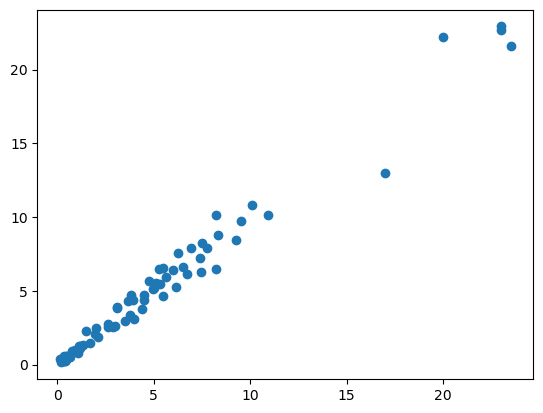

In [67]:
plt.scatter(y_test, CBR_y_pred);

In [68]:
# evaluate model
CBR_MAE = mean_absolute_error(y_test, CBR_y_pred)
CBR_MSE = mean_squared_error(y_test, CBR_y_pred)
CBR_R2 = r2_score(y_test, CBR_y_pred)

# printing the results
print(f'MAE:{CBR_MAE}, MSE: {CBR_MSE}, R2: {CBR_R2}')

MAE:0.5097258370652804, MSE: 0.6627723092087091, R2: 0.9758766475456004


In [69]:
CBR_df = pd.DataFrame({'Actual': y_test, 'Prediction': CBR_y_pred})
CBR_df.head()

,Actual,Prediction
177,0.35,0.592639
289,10.11,10.833225
228,4.95,5.120798
198,0.15,0.342871
60,6.95,7.926235


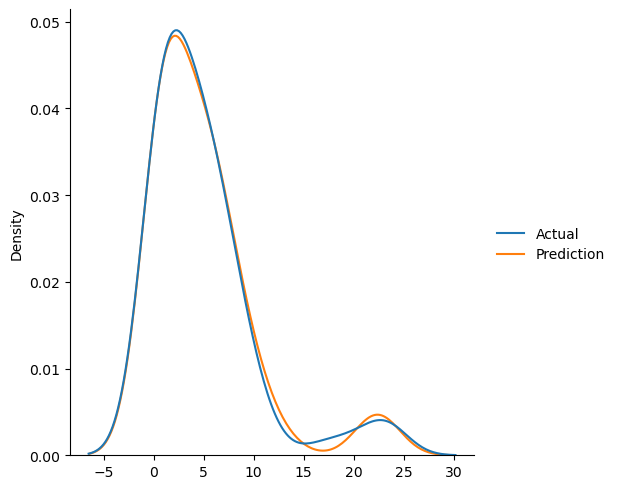

In [70]:
ax = sns.displot(data = (CBR_df['Actual'], CBR_df['Prediction']),kind = 'kde')

Catboost regressor also is doing well so tuning is unnecessary

In [72]:
print(f'GBR_MAE:{round(GBR_MAE, 3)}, GBR_MSE: {round(GBR_MSE, 3)}, GBR_R2: {round(GBR_R2, 3)}')
print('-----------------------------------')
print(f'SGDR_MAE:{round(SGDR_MAE, 3)}, SGDR_MSE: {round(SGDR_MSE, 3)}, SGDR_R2: {round(SGDR_R2, 3)}')
print('-----------------------------------')
print(f'Tuned_SGDR_MAE:{round(T_SGDR_MAE, 3)}, Tuned_SGDR_MSE: {round(T_SGDR_MSE, 3)}, Tuned_SGDR_R2: {round(T_SGDR_R2, 3)}')
print('-----------------------------------')
print(f'RFR_MAE: {round(RFR_MAE, 3)} | RFR_MSE: {round(RFR_MSE, 3)} | RFR_R2: {round(RFR_R2, 3)}')
print('-----------------------------------')
print(f'CBR_MAE:{round(CBR_MAE, 3)}, CBR_MSE: {round(CBR_MSE, 3)}, CBR_R2: {round(CBR_R2, 3)}')

GBR_MAE:0.541, GBR_MSE: 0.881, GBR_R2: 0.968
-----------------------------------
SGDR_MAE:6.424550755986201e+18, SGDR_MSE: 5.884683481743032e+37, SGDR_R2: -2.1418863120904382e+36
-----------------------------------
Tuned_SGDR_MAE:59.07, Tuned_SGDR_MSE: 5217.386, Tuned_SGDR_R2: -188.901
-----------------------------------
RFR_MAE: 0.575 | RFR_MSE: 0.794 | RFR_R2: 0.971
-----------------------------------
CBR_MAE:0.51, CBR_MSE: 0.663, CBR_R2: 0.976


## Conclusion

Based on our exploratory data analysis, it was determined that the selling price of cars is predominantly influenced by factors such as the current price, fuel type, and seller type. Specifically, a higher current price tends to correspond to a higher selling price. Moreover, vehicles with diesel fuel type tend to exhibit higher price tags, while cars sold by dealers tend to have inflated prices, potentially attributable to profit margins.

In the realm of machine learning models, we conducted a comprehensive comparison analysis involving four specific regressor models: Gradient Boosting Regressor, SGD Regressor, Random Forest Regressor, and CatBoost Regressor. Subsequent evaluation revealed that the CatBoost Regressor exhibited the highest accuracy score, garnering an impressive performance level of 97.6%.